In [1]:
from scipy.integrate import ode

In [2]:
%pylab inline
import numpy as np

Populating the interactive namespace from numpy and matplotlib


In [198]:
g, l, k, m = [10., 1.5, 30., .5]

X0 = 0
XF = 10
Y0 = [.5, 0., 0., 0.]

In [199]:
def f(t, Ys):
    th, dth, x, dx = Ys
    ddx = (l+x)*dth**2 - k/m*x + g*np.cos(th)
    ddth = (-g*np.sin(th) - 2*dx*dth)/(l+x)
    return np.array([dth, ddth, dx, ddx])

In [200]:
def solve(f, with_h = 1.):
    r = ode(f)
    r.set_initial_value(Y0, X0)

    dt = with_h
    Xs = []
    Ys = []
    
    max_iter = 1e6
    while r.successful() and r.t < XF and max_iter > 0:
        r.integrate(r.t + dt)
        Xs.append(r.t)
        Ys.append(r.y)
        max_iter -= 1
    return Xs, Ys

In [201]:
Xs, Ys = solve(f, with_h = 1e-4)

In [202]:
def plot_trajectory(Ys):
    ths = array(Ys)[:, 0]
    ls = array(Ys)[:, 3]
    Xs = (l+ls)*np.sin(ths)
    Ys = -(l+ls)*np.cos(ths)
    plot(Xs, Ys)
    plot(0., 0., 'ro')

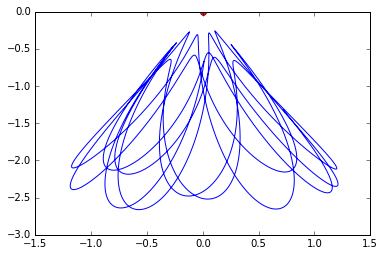

In [203]:
plot_trajectory(Ys)

In [170]:
from vapory import *
from IPython.display import Image
from IPython.display import *
import time
from moviepy.editor import VideoClip

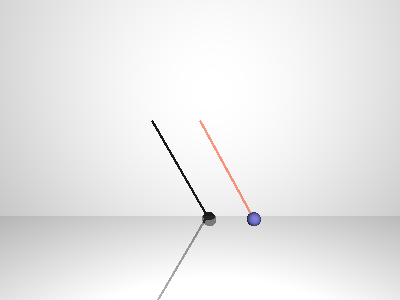

In [204]:
color = lambda col: Texture( Pigment( 'color', col))

def scene(th, x):  
    wall = Plane([0, 0, 1], 20, Texture(Pigment('color', [1, 1, 1])))
    ground = Plane( [0, -20, 0], 10,
                Texture( Pigment( 'color', [1, 1, 1]),
                         Finish( 'phong', 0.1,
                                 'reflection',0.4,
                                 'metallic', 0.3)))

    radius = m/4.
    sphere = Sphere([0,0,0],
                    radius,
                    color([.5, .5, .9]),
                    'translate', [0., x+l, 0.])
    spring = Box([-.02, x+l, 0] , [.02,0,0],
                        color([1,.6,.5]))
    pendulum = Union(spring,
                     sphere,
                     'rotate', [0, 0, 180 + np.rad2deg(th)],
                     'translate', [0., 0.5, 0.])
    return Scene( Camera( 'location', [0, 1, -5], 'look_at',  [0, 0, 0] ),
            [ LightSource( [1, 1, -5], 'color', [1.5,1.5,1.5] ),
              Background( "color", [1,1,1] ),
              pendulum,
              wall,
              ground])
scene(0.5, 0.5).render('ipython', width=400, height=300)

In [205]:
def anim(Ys, d=10):
    ths = array(Ys)[:, 0]
    ls = array(Ys)[:, 3]
    ln = len(ls)
    scale = lambda t: int(t/d*ln)
    make_frame = lambda t: scene(ths[scale(t)], ls[scale(t)]).render(width = 400, height = 300, antialiasing=0.1)
    name = "anim_%d.gif" % time.time() 
    VideoClip(make_frame, duration=d).write_gif(name, fps=30)
    return Image(url = name)

In [206]:
anim(Ys, d=10)


[MoviePy] Building file anim_1461609184.gif with imageio
